In [1]:
import pandas as pd
data=pd.read_excel("C:/Users/HP/Downloads/iris (1).xls")

In [2]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.isna().sum()#checking null values

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [4]:
data.fillna(data.mean(), inplace=True)#replacing null values by mean

In [5]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

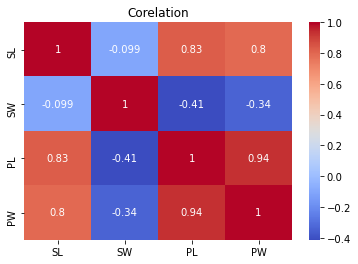

In [7]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')#corelation matrix
plt.title('Corelation')
plt.show()

In [8]:
X = data.drop('Classification',axis=1)

In [9]:
X

,SL,SW,PL,PW
0,5.100000,3.5,1.40000,0.2
1,4.900000,3.0,1.40000,0.2
2,5.855944,3.2,1.30000,0.2
3,4.600000,3.1,1.50000,0.2
4,5.000000,3.6,1.40000,0.2
...,...,...,...,...
145,6.700000,3.0,5.20000,2.3
146,6.300000,2.5,5.00000,1.9
147,6.500000,3.0,3.75625,2.0
148,6.200000,3.4,5.40000,2.3


In [10]:
y=data['Classification']

In [11]:
#splitting data into Train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [12]:
X_train

,SL,SW,PL,PW
22,4.600000,3.6,1.00000,0.2
15,5.700000,4.4,1.50000,0.4
65,6.700000,3.1,4.40000,1.4
11,4.800000,3.4,1.60000,0.2
42,4.400000,3.2,3.75625,0.2
...,...,...,...,...
71,6.100000,2.8,4.00000,1.3
106,5.855944,2.5,4.50000,1.7
14,5.800000,4.0,1.20000,0.2
92,5.800000,2.6,4.00000,1.2


# KNN

In [13]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
knn_pred = knn.predict(X_test)
knn_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [15]:
#evaluation
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN ACCURCY:", knn_accuracy)

KNN ACCURCY: 0.9666666666666667


In [16]:
from sklearn.metrics import classification_report

In [17]:
print(classification_report(knn_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [45]:
conf_matrix = confusion_matrix(y_test, knn_pred)
conf_matrix

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

# SVM

In [18]:
from sklearn.svm import SVC

In [19]:
svc= SVC()
svc.fit(X_train, y_train)

SVC()

In [20]:
svc_pred = svc.predict(X_test)

In [21]:
svc_accuracy = accuracy_score(y_test, svc_pred)
print("SVM Accuracy:", svc_accuracy)

SVM Accuracy: 1.0


In [22]:
print(classification_report(svc_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [41]:
from sklearn.metrics import confusion_matrix

In [43]:
conf_matrix = confusion_matrix(y_test, svc_pred)
conf_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)


# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [25]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [26]:
log_pred = log_reg.predict(X_test)

In [27]:
log_accuracy = accuracy_score(y_test, log_pred)
print("Logistic Regression Accuracy:", log_accuracy)

Logistic Regression Accuracy: 1.0


In [28]:
print(classification_report(log_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [46]:
conf_matrix = confusion_matrix(y_test, log_pred)
conf_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [30]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [31]:
dt_pred=dt.predict(X_test)

In [34]:
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 1.0


In [40]:
print(classification_report(dt_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [47]:
conf_matrix = confusion_matrix(y_test, dt_pred)
conf_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [37]:
rf_pred=rf.predict(X_test)

In [38]:
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Decision Tree Accuracy:", rf_accuracy)

Decision Tree Accuracy: 1.0


In [39]:
print(classification_report(rf_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [48]:
conf_matrix = confusion_matrix(y_test, rf_pred)
conf_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Among the model created SVM,Random Forest,Logistic Regression,Decision tree has most accuracy and same Precision